# SVM и его ядра
__Суммарное количество баллов: 10__

В этом задании вам не нужно будет реализовать SVM, а научиться его применять.

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [1]:
from sklearn.svm import SVC 
from sklearn.datasets import make_blobs

X_blobs2, y_blobs2  = make_blobs(n_samples=1000, random_state=4, center_box=(-2, 2),cluster_std=0.4, centers=2)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

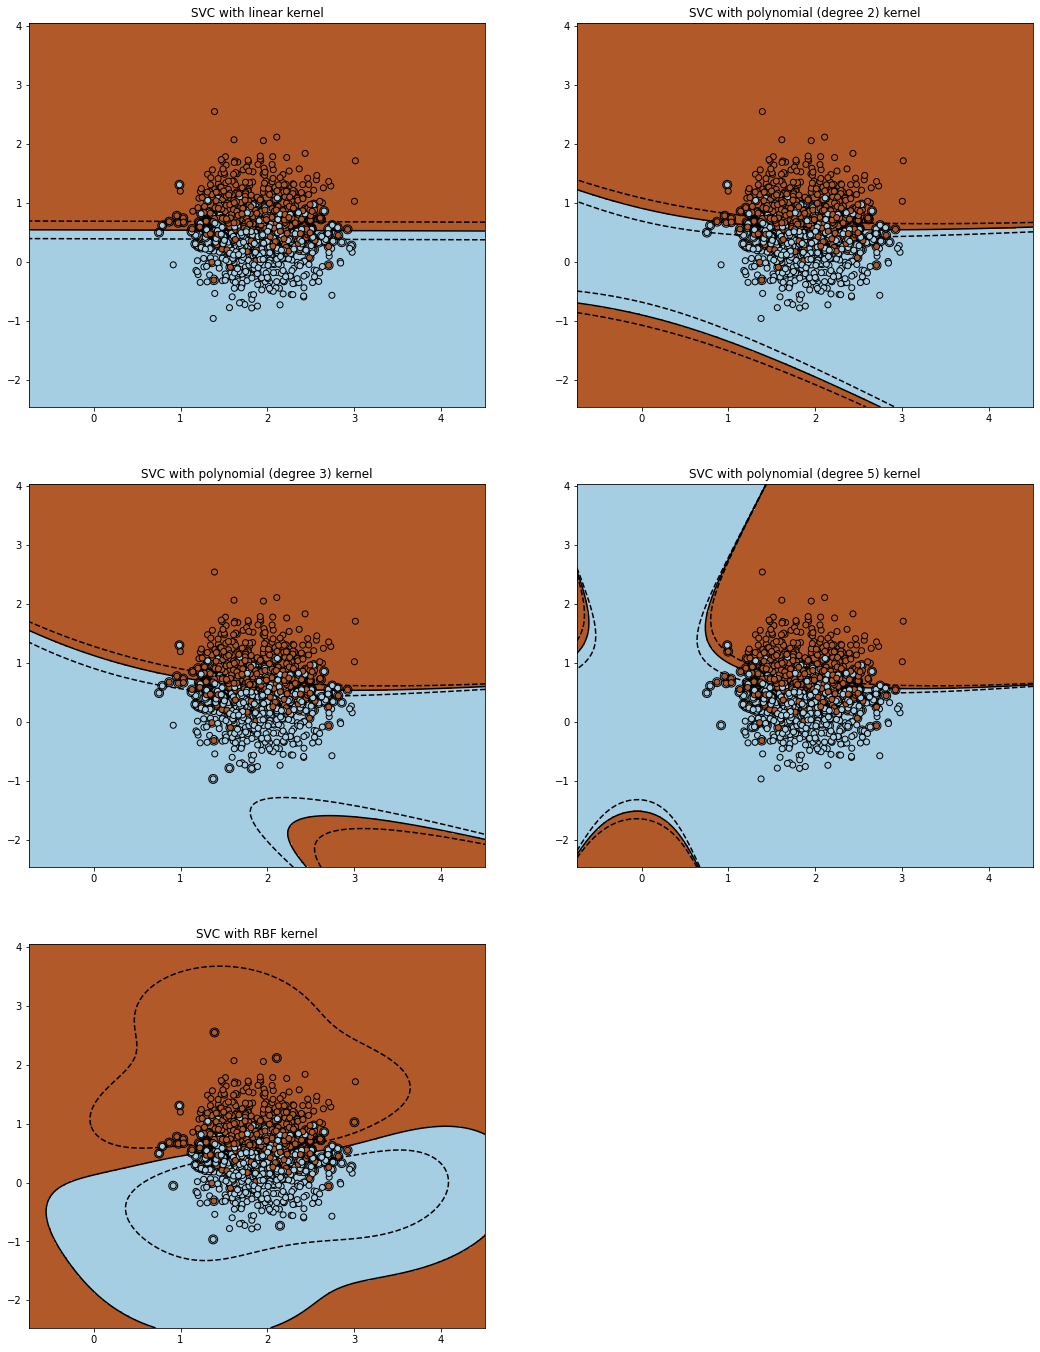

In [3]:
kernel_list = ['linear', 2, 3, 5, 'rbf']
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 5) kernel',
          'SVC with RBF kernel']
fig = plt.figure(figsize=(18, 24))
scale = 1.5

for i, kernel in enumerate(kernel_list):
    if type(kernel) == int:
        clf = SVC(kernel='poly', degree=kernel)
    else:
        clf = SVC(kernel=kernel)
        
    clf.fit(X_blobs2, y_blobs2)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X_blobs2[:, 0], X_blobs2[:, 1], c=y_blobs2, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = X_blobs2[:, 0].min() - scale
    x_max = X_blobs2[:, 0].max() + scale
    y_min = X_blobs2[:, 1].min() - scale
    y_max = X_blobs2[:, 1].max() + scale

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(titles[i])
plt.show()

Протестируйте SVM на датасете spam. Для этой задачи используйте данные x_spam_train и y_spam_train:

1. Выполните загрузку и предобработку файлов x_spam_train и y_spam_train.
2. Разбейте x_spam_train и y_spam_train на x_train, y_train, x_test и y_test для оценки точности работы алгоритма.
3. Посчитайте метрики precision, recall, accuracy для модели SVM. Если необходимо, попробуйте разные наборы параметров для получения лучшего результата.
4. Сравните время работы SVM и Random Forest при близкой точности.

Ответьте на следующие вопросы:
1. Какой нужен препроцессинг данных для моделей?
2. Какая модель делает предсказания лучше? Предположите, почему.

In [4]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier


x_spam_train = pd.read_csv("x_spam_train.csv", index_col=0)
x_spam_test = pd.read_csv("x_spam_test.csv", index_col=0)

y_spam_train = pd.read_csv("y_spam_train.csv", index_col=0)
y_spam_train = y_spam_train['Expected']

# масштабируем признаки
scaler = MinMaxScaler()
x_spam_train_scaled = scaler.fit_transform(x_spam_train)
x_spam_test_scaled = scaler.transform(x_spam_test)

x_train, x_test, y_train, y_test = train_test_split(x_spam_train_scaled, y_spam_train, test_size=0.2, random_state=42)

In [14]:
# results of GridSearchCV on scaled data
best_C = 1.8 * 10**5
best_kernel = 'rbf'
best_gamma = 'auto'

In [15]:
def print_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)

    print(f"Precision is: {precision}")
    print(f"Recall is: {recall}")
    print(f"Accuracy is: {accuracy}")
    print(f"F1_score is: {f1score}")

In [53]:
best_svc = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)
best_svc.fit(x_train, y_train)
y_pred_svc = best_svc.predict(x_test)
print("SVC metrics:\n")
print_metrics(y_test, y_pred_svc)

SVC metrics:

Precision is: 0.9194139194139194
Recall is: 0.9061371841155235
Accuracy is: 0.9347826086956522
F1_score is: 0.9127272727272727


In [54]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)
print("RandomForest metrics:\n")
print_metrics(y_test, y_pred_rf)

RandomForest metrics:

Precision is: 0.9296296296296296
Recall is: 0.9061371841155235
Accuracy is: 0.938858695652174
F1_score is: 0.9177330895795247


In [17]:
%%timeit
best_svc = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)
best_svc.fit(x_train, y_train)
y_pred_svc = best_svc.predict(x_test)

1.53 s ± 29.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)

398 ms ± 4.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Ответы на вопросы
0. При близкой точности, SVC работает несколько медленнее RandomForest. И в целом при поиске оптимальных параметров было заметно, что SVC требуется больше времени. При этом здесь не бралось в учет масштабирование данных, которое необходимо для корректной работы SVC. Без препроцессинга SVC вообще зависал :)
1. Датасет у нас из прошлых заданий, в нем нет пропусков, но последние два столбца принимают большие значения и являются категориальными. Поэтому для RandomForest никакой предобработки данных не требуется, в то время как для SVC обязательно масштабирование, иначе признаки с большими значениями будут стягивать работу модели на себя и будут причиной перекоса предсказаний. В данном случае лучше всех себя показал MinMaxScaler, поскольку многие признаки чаще всего равняются нулю, и предположение о нормальности данных выглядит неестественным.
2. RandomForest даже без настройки выдает результаты лучше. На мой взгляд, так происходит из-за возможности деревьев строить более сложные границы в пространстве объектов. SVC же задается ядром, и отсюда вытекает некоторая ограниченность в построении границ решения у данной модели.

Обучите модель на всех данных из x_spam_train и y_spam_train.
Сделайте submit своего решения и получите значение f1_score не менее 0.6

In [ ]:
final_svc = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)
final_svc.fit(x_spam_train_scaled, y_spam_train)
y_pred = final_svc.predict(x_spam_test_scaled)

In [ ]:
submission = pd.DataFrame(columns = ["Id", "Expected"])
submission["Id"] = x_spam_test.index
submission["Expected"] = y_pred
submission.to_csv('submission.csv', index=False)